C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_18996\918064725.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,


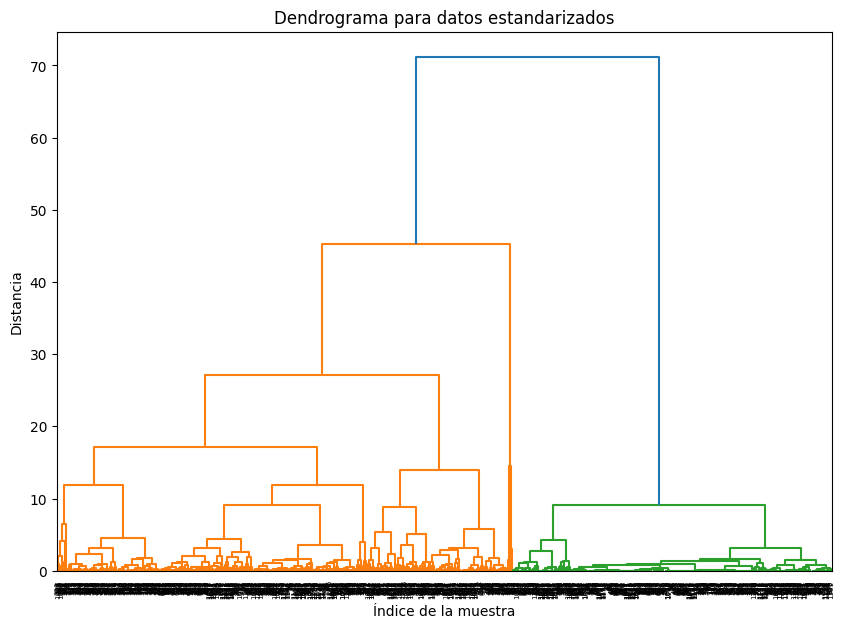

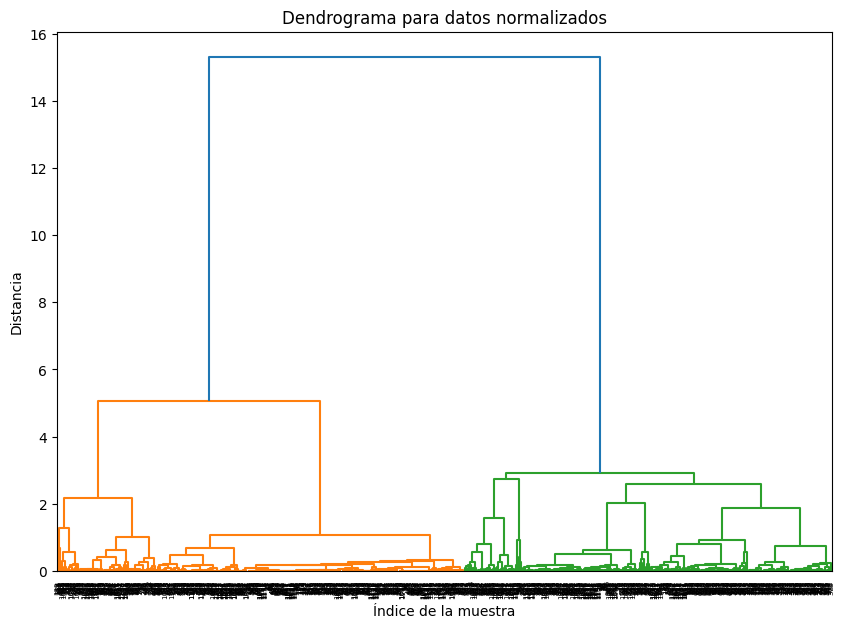

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Leer los datos (ajusta la ruta según tus necesidades)
df = pd.read_csv('C:/Users/WAGNER FERNÁNDEZ/OneDrive - Universidad Nacional Abierta y a Distancia/1.Periodo 1/3-Machine Learning/2-Unidad 2/Fase 4/data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

df_imputed = df['wip'].median()#calcular la mediana de la columna 'wip'

#imputar el df
df['wip'].fillna(df_imputed, 
                 inplace=True)
df

############################################## aplicacion del clustering jerarquico ############################

# Seleccionar las columnas numéricas relevantes para el análisis
data = df[['smv', 'wip', 'over_time', 'no_of_workers']]

# Estandarizar los datos
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Normalizar los datos
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# Crear nuevos dataframes con los datos estandarizados y normalizados
df_standardized = pd.DataFrame(data_standardized, columns=data.columns)
df_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Aplicar el clustering jerárquico y generar el dendrograma para datos estandarizados
linked_standardized = linkage(data_standardized, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked_standardized,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma para datos estandarizados')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

# Aplicar el clustering jerárquico y generar el dendrograma para datos normalizados
linked_normalized = linkage(data_normalized, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked_normalized,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma para datos normalizados')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Cargar dataframe
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

df_imputed = df['wip'].median()#calcular la mediana de la columna 'wip'

#imputar el df
df['wip'].fillna(df_imputed, 
                 inplace=True)

# Seleccionar variables relevantes
X = df[['smv', 'wip', 'over_time', 'no_of_workers', 'actual_productivity', 'day']]

X = pd.get_dummies(X, columns=['day'], drop_first=True)

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear dendrograma
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Clusters')
plt.show()

# Encontrar número óptimo de clusters
n_clusters = 4  # número óptimo de clusters según el dendrograma

# Entrenar modelo de agrupamiento jerárquico
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clustering.fit(X_scaled)

# Visualizar clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clustering.labels_)
plt.title('Clusters')
plt.xlabel('SMV')
plt.ylabel('WIP')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv'